# Introducción a la detección de objetos

En este cuaderno veremos los pasos necesarios para realizar detección de objetos utilizando [Ultralytics YOLO v8](https://docs.ultralytics.com/)

**NOTA:** No olvides seleccionar la GPU como entorno de ejecucuión

## Paso 1. Instalar Ultralytics

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 12.2 MB/s eta 0:00:00


## Paso 2. Cargar el modelo en Python

Ultralytics proporciona un modelo de YOLOv8 pre entrenado el cual podemos utilizar para diversas tareas

In [2]:
from ultralytics import YOLO

#Creamos el modelo yolov8 pre entrenado
model = YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 108MB/s]


## Paso 3. Entrenar el modelo

Entrenaremos el modelo con el dataset de [COCO](https://cocodataset.org/#home).

Este paso nos permite adaptar nuestro modelo a un dataset personalizado.

In [3]:
results = model.train(data='coco128.yaml', epochs=5)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 6.66M/6.66M [00:00<00:00, 76.3MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 580.20file/s]

Dataset download success ✅ (1.3s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 145.73it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.126      1.512      1.253        196        640: 100%|██████████| 8/8 [02:19<00:00, 17.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:48<00:00, 12.22s/it]

                   all        128        929      0.659      0.519      0.614      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       1.19      1.418      1.233        249        640: 100%|██████████| 8/8 [02:09<00:00, 16.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.74s/it]

                   all        128        929      0.687      0.535      0.629       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.142      1.378      1.247        190        640: 100%|██████████| 8/8 [02:06<00:00, 15.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.17s/it]

                   all        128        929      0.678      0.565      0.644      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.171      1.381      1.231        222        640: 100%|██████████| 8/8 [02:08<00:00, 16.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:46<00:00, 11.51s/it]

                   all        128        929      0.688       0.57      0.649      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.121       1.34      1.208        179        640: 100%|██████████| 8/8 [02:08<00:00, 16.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:45<00:00, 11.49s/it]

                   all        128        929      0.689      0.587      0.655      0.489



5 epochs completed in 0.248 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.54s/it]


                   all        128        929      0.688      0.588      0.654      0.489
                person         61        254      0.793      0.685      0.776      0.545
               bicycle          3          6      0.605      0.333      0.329      0.273
                   car         12         46      0.699      0.217        0.3      0.182
            motorcycle          4          5      0.684      0.873      0.938      0.754
              airplane          5          6      0.723      0.833      0.894      0.685
                   bus          5          7      0.753      0.714      0.736      0.644
                 train          3          3      0.552      0.667       0.83      0.781
                 truck          5         12          1       0.31      0.506      0.342
                  boat          2          6       0.47      0.333       0.46      0.292
         traffic light          4         14      0.709      0.214      0.201      0.138
             stop sig

## Paso 3. Validar

Despues de haber entrenado el modelo es importante validar los datos para asegurarnos de que las predicciones tienen un bajo porcentaje de error.

In [4]:
results = model.val()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:33<00:00,  4.15s/it]


                   all        128        929      0.683      0.587      0.648      0.483
                person         61        254      0.805      0.681      0.778      0.547
               bicycle          3          6       0.61      0.333      0.328      0.273
                   car         12         46      0.708      0.217      0.301       0.18
            motorcycle          4          5      0.685      0.877      0.938      0.754
              airplane          5          6      0.725      0.833      0.894      0.685
                   bus          5          7      0.678      0.714      0.735      0.644
                 train          3          3      0.553      0.667       0.83      0.781
                 truck          5         12          1      0.308      0.494      0.309
                  boat          2          6      0.397      0.333      0.428      0.238
         traffic light          4         14      0.734        0.2      0.201      0.138
             stop sig

## Paso 4. Realizar predicciones con el modelo

In [5]:
from google.colab import files

uploaded = files.upload()

Saving aparcamientos-disuasorios-ciudades.webp to aparcamientos-disuasorios-ciudades.webp
Saving image_via_parking_industry.jpg to image_via_parking_industry.jpg
Saving parking-in-philadelphia.jpg to parking-in-philadelphia.jpg
Saving Parkings-640x321.jpg to Parkings-640x321.jpg


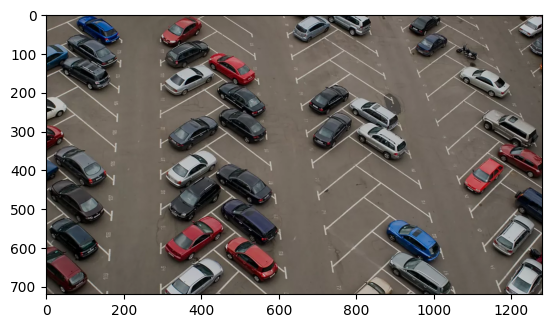

In [6]:
import cv2
import matplotlib.pyplot as plt

image_path = list(uploaded.keys())[0]

image = cv2.imread(image_path)

plt.imshow(image[:,:,::-1])


0: 384x640 41 cars, 245.5ms
Speed: 6.8ms preprocess, 245.5ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)


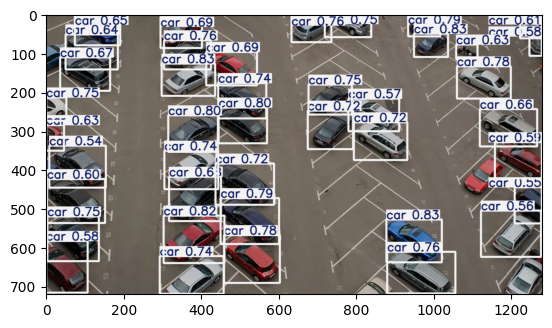

In [7]:
results = model.predict(source=image, conf=0.5)

results[0].save("result.png")

result = cv2.imread("result.png")

plt.imshow(result[:,:,::-1])

## Paso 6. Exportar el modelo

Ultralytics permite exportar el modelo para utilizarlo en distintas aplicaciones.

Puedes revisar más sobre como exportar el modelo en la documentación oficial.

In [8]:
#Exportar el modelo
model.export()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.5.0+cu121...
TorchScript: export success ✅ 3.0s, saved as 'runs/detect/train/weights/best.torchscript' (12.5 MB)

Export complete (4.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/datasets/coco128.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

In [9]:
#Descargar el modelo
files.download("yolov8n.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>